# Covid-19 Data Analysis

# 1

##### Download the data from the given link 

# 2

##### Create a DataFrame from the CSV file.

In [104]:
import pandas as pd
data = pd.read_csv("time-series-19-covid-combined.csv")
df=pd.DataFrame(data)

In [105]:
df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0
...,...,...,...,...,...,...
154561,2021-07-24,Zimbabwe,NaN,97277,64628.0,3050
154562,2021-07-25,Zimbabwe,NaN,97894,65913.0,3094
154563,2021-07-26,Zimbabwe,NaN,99944,67827.0,3173
154564,2021-07-27,Zimbabwe,NaN,101711,70496.0,3280


# 3

##### Merge the data for countries with multiple regions in order to provide a single time-series for each country.

In [89]:
df_new = df.groupby(['Date', 'Country/Region'])["Confirmed", "Recovered",'Deaths'].apply(lambda x : x.sum())

In [90]:
df_new

Confirmed  Recovered  Deaths
Date       Country/Region                                  
2020-01-22 Afghanistan               0.0        0.0     0.0
           Albania                   0.0        0.0     0.0
           Algeria                   0.0        0.0     0.0
           Andorra                   0.0        0.0     0.0
           Angola                    0.0        0.0     0.0
...                                  ...        ...     ...
2021-07-28 Vietnam              123640.0    27457.0   630.0
           West Bank and Gaza   316328.0   311622.0  3601.0
           Yemen                  7027.0     4168.0  1374.0
           Zambia               193432.0   183957.0  3338.0
           Zimbabwe             103567.0    71383.0  3340.0

[108030 rows x 3 columns]

# 4

##### Print the total number of confirmed cases and number of deaths in each country in the last reported day. What are the 10 countries with the highest number of confirmed COVID-19 cases? What are the 10 countries with the highest number of deaths?

In [37]:
df_new.reset_index(level=0, inplace=True)
latest=df_new['Date'].max()
df_1 = df_new[df_new['Date'] == latest]

In [38]:
df_1

,Date,Confirmed,Recovered,Deaths
Country/Region,,,,
Afghanistan,2021-07-28,145552.0,82586.0,6577.0
Albania,2021-07-28,132952.0,130174.0,2457.0
Algeria,2021-07-28,167131.0,112900.0,4161.0
Andorra,2021-07-28,14586.0,14113.0,127.0
Angola,2021-07-28,42288.0,35964.0,1000.0
...,...,...,...,...
Vietnam,2021-07-28,123640.0,27457.0,630.0
West Bank and Gaza,2021-07-28,316328.0,311622.0,3601.0
Yemen,2021-07-28,7027.0,4168.0,1374.0


In [21]:
df_1['Confirmed'].nlargest(10)

Country/Region
US                34672690.0
India             31484605.0
Brazil            19797086.0
France             6116853.0
Russia             6116249.0
United Kingdom     5797445.0
Turkey             5660469.0
Argentina          4891810.0
Colombia           4757139.0
Spain              4395602.0
Name: Confirmed, dtype: float64

In [22]:
df_1['Deaths'].nlargest(10)

Country/Region
US                611801.0
Brazil            553179.0
India             422022.0
Mexico            239616.0
Peru              196138.0
Russia            153620.0
United Kingdom    129718.0
Italy             128010.0
Colombia          119801.0
France            111923.0
Name: Deaths, dtype: float64

# 5

##### Plot a graph of the number of confirmed cases over time for each country. Which countries present exponential growth in the number of cases and which countries are already leaving exponential growth?

In [ ]:
# dividing the column into 16 equal arrays for subplotting purposes

In [91]:
df_new.reset_index(level=0, inplace=True)

In [93]:
import numpy as np
df1, df2, df3, df4, df5, df6, df7, df8 = np.array_split(df_new[['Date','Confirmed']], 8)

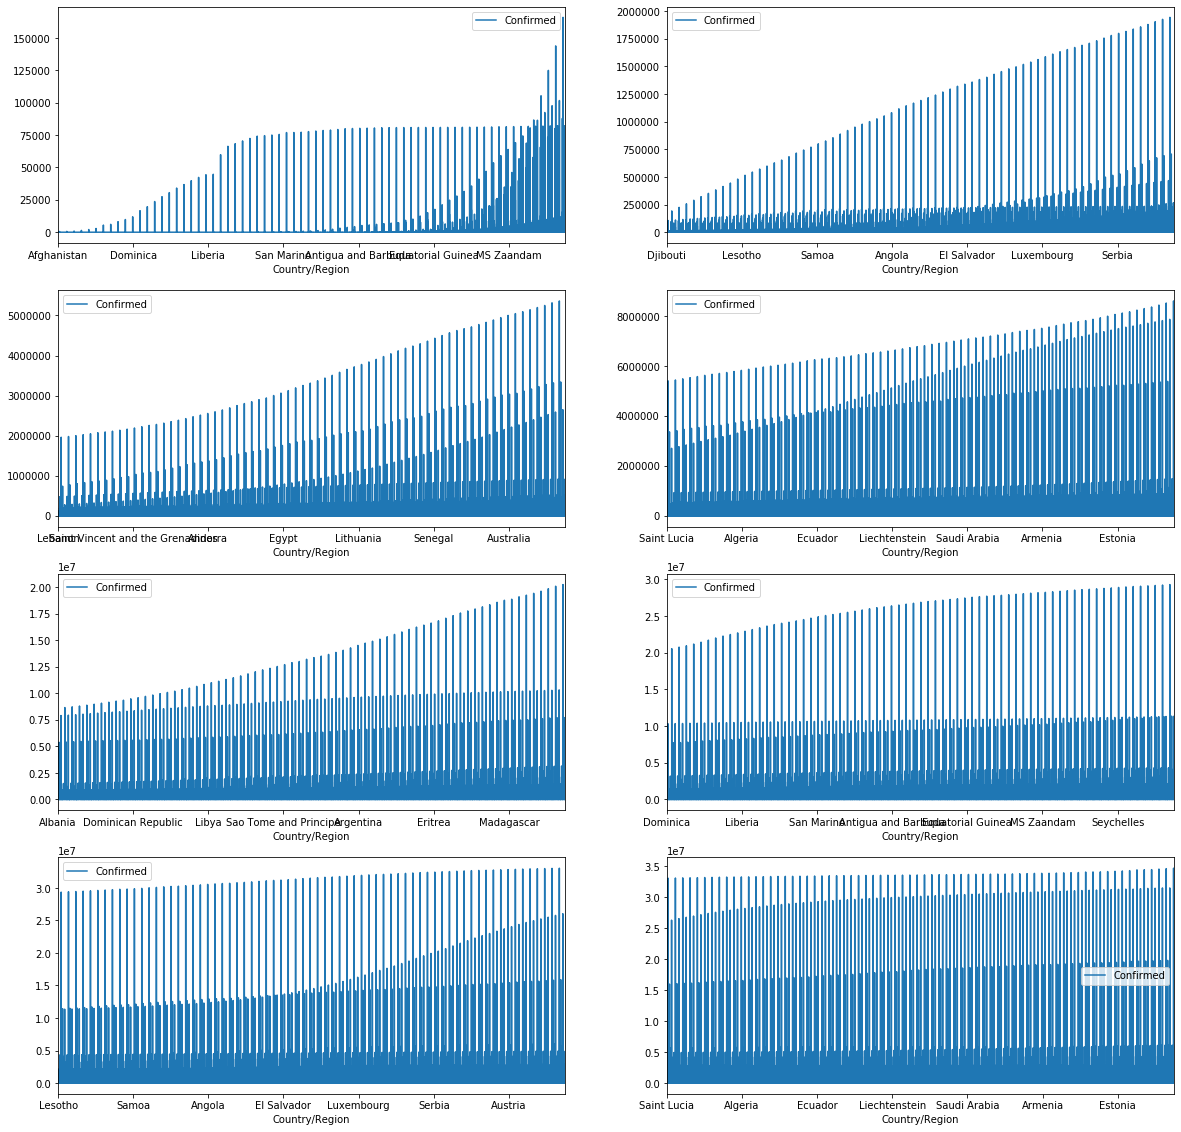

In [94]:
# plotting the graphs together by using subplot method
df_list = [df1 ,df2, df3, df4, df5, df6, df7, df8]
fig, axes = plt.subplots(4, 2)

#counter
count=0
for i in range(4):
    for j in range(2):
        df_list[count].plot(ax=axes[i,j], figsize=(20,20))
        count+=1

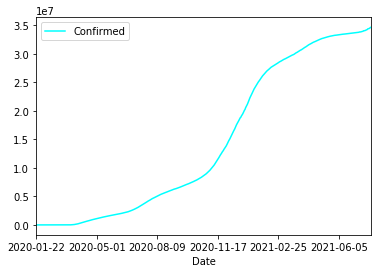

In [106]:
# to make plots look comprehensible, i tried plotting them one at a time for one country

import matplotlib.pyplot as plt
df_US=df[df['Country/Region'] == 'US']
df_US.plot( 'Date' ,'Confirmed', color='cyan' )
plt.show()

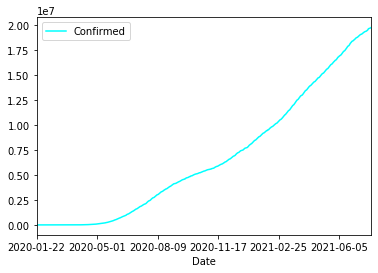

In [108]:
df_Brazil=df[df['Country/Region'] == 'Brazil']
df_Brazil.plot( 'Date' ,'Confirmed', color='cyan' )
plt.show()

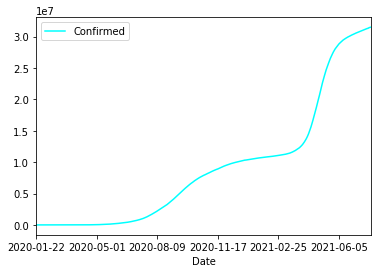

In [109]:
df_India=df[df['Country/Region'] == 'India']
df_India.plot( 'Date' ,'Confirmed', color='cyan' )
plt.show()

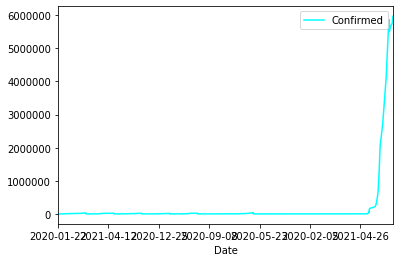

In [110]:
df_France=df[df['Country/Region'] == 'France']
df_France.plot( 'Date' ,'Confirmed', color='cyan' )
plt.show()

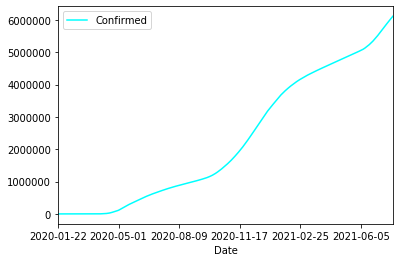

In [111]:
df_Russia=df[df['Country/Region'] == 'Russia']
df_Russia.plot( 'Date' ,'Confirmed', color='cyan' )
plt.show()

Through these plots we found out that, while countries like US, Brazil, India, Russia had a similar increase in the covid confirmed cases throughout the duration, there were countries like France which encountered a sudden upheaval in the cases around April,2021.

# 6

##### Create a bar plot that shows the number of deaths per 100 confirmed cases (observed case-fatality ratio) for the 20 most affected countries. See Figure 1 for an example.

In [39]:
df_6=df_1
df_6.fillna(0)
df_6['Death_percent_confirmed']=df_6['Deaths']*100/df_6['Confirmed']
del df_6['Date']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


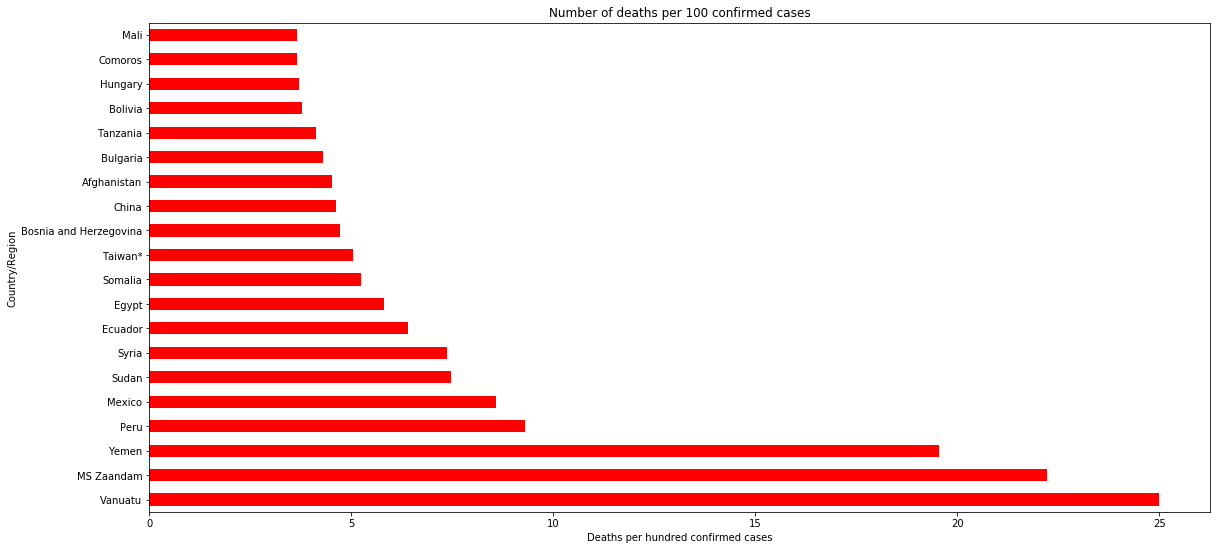

In [46]:
# plotting a horizontal bar graph
import matplotlib.pyplot as plt

plt.title('Number of deaths per 100 confirmed cases')
plt.xlabel('Deaths per hundred confirmed cases')
plt.ylabel('Country/Region')
df_6['Death_percent_confirmed'].nlargest(20).plot.barh(figsize=(19,9), color='red')

# 7

##### Compute the ratio between the total number of confirmed cases and the population size of each country. The file worldpopulation.json contains data on the population size of each country.

#### Data Cleaning

In [49]:
population=pd.read_json('worldpopulation.json')
df_6.reset_index(level=0, inplace=True)
df_7=df_6

In [50]:
# Finding out the non-matching countries in the two datasets
x=pd.DataFrame()
x=population['country'].sort_values()
x=x.reset_index(drop=True) 
data=[df_7['Country/Region'], x]
names = ["country_1", "country_2"]
df_check= pd.concat(data, axis=1, keys=names)
print(list(set(df_check.country_1)-set(df_check.country_2)))

['West Bank and Gaza', 'Taiwan*', 'US', 'Burma', 'Summer Olympics 2020', 'Saint Vincent and the Grenadines', 'Vietnam', 'Kosovo', 'United Kingdom', "Cote d'Ivoire", 'Congo (Brazzaville)', 'Eswatini', 'Korea, South', 'North Macedonia', 'Diamond Princess', 'Congo (Kinshasa)', 'MS Zaandam', 'Czechia']


In [52]:
# preprocessing the data
# changing the names of countries so that they match
update_df=pd.DataFrame()
update_df['Country/Region']=df_7['Country/Region'].replace("Czechia", "Czech Republic",inplace=True)
update_df['Country/Region']=df_7['Country/Region'].replace("North Macedonia", "North Korea",inplace=True)
update_df['Country/Region']=df_7['Country/Region'].replace("Taiwan*", "TFYR Macedonia",inplace=True)
update_df['Country/Region']=df_7['Country/Region'].replace("US", "U.S.",inplace=True)
update_df['Country/Region']=df_7['Country/Region'].replace("United Kingdom", "U.K.",inplace=True)
update_df['Country/Region']=df_7['Country/Region'].replace("Vietnam", "Viet Nam",inplace=True)

# removing the rows with countries that are only present in one dataset
update_df = df_7.drop(df_7.index[[40, 42, 48, 58, 92, 93, 106, 148, 167]])
update_pop= population.drop(population.index[[54, 45, 15, 24, 118, 25, 150, 178, 180, 147, 108, 192, 193]])

update_df = update_df.reset_index(drop=True)
update_pop = update_pop.reset_index(drop=True)
update_df = update_df.set_index('Country/Region')
update_df = update_df.reindex(index=population['country'])
update_df = update_df.reset_index()
update_df= update_df.dropna()
update_df = update_df.reset_index(drop=True)
update_pop= update_pop.dropna()
update_pop = update_pop.reset_index(drop=True)

# creating a new dataframe to check whether all the country names are same or not 
data2=[update_df['country'], update_pop['country']]
names2= ["country_1", "country_2"]
df_check2= pd.concat(data2, axis=1, keys=names2)

In [55]:
# displaying the dataframe containing both the columns of countries to compare them
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_check2)

                    country_1                 country_2
0                       China                     China
1                       India                     India
2                        U.S.                      U.S.
3                   Indonesia                 Indonesia
4                      Brazil                    Brazil
5                    Pakistan                  Pakistan
6                     Nigeria                   Nigeria
7                  Bangladesh                Bangladesh
8                      Russia                    Russia
9                      Mexico                    Mexico
10                      Japan                     Japan
11                   Ethiopia                  Ethiopia
12                Philippines               Philippines
13                   Viet Nam                  Viet Nam
14                      Egypt                     Egypt
15                       Iran                      Iran
16                    Germany                   

#### Finding the Ratio

In [59]:
df_ratio=pd.DataFrame()
df_ratio['Cases_per_capita']=update_df['Confirmed']/update_pop['population']
df_ratio['Country']=update_pop['country']

In [60]:
df_ratio

,Cases_per_capita,Country
0,0.000076,China
1,0.023452,India
2,0.106204,U.S.
3,0.012477,Indonesia
4,0.093717,Brazil
...,...,...
177,0.081085,Liechtenstein
178,0.074533,Monaco
179,0.159793,San Marino
180,0.001243,Palau


##### What are the 10 countries with the highest number of confirmed COVID-19 cases per capita?

In [57]:
df_per_capita=pd.DataFrame()
df_per_capita['Cases_per_capita']=update_df['Confirmed']*100/update_pop['population']
df_per_capita['Country']=update_pop['country']

In [58]:
df_per_capita.nlargest(10,'Cases_per_capita')

,Cases_per_capita,Country
174,21.222791,Andorra
160,20.510979,Maldives
140,18.947561,Bahrain
171,18.517721,Seychelles
152,16.206946,Montenegro
179,15.979317,San Marino
80,15.850274,Czech Republic
154,12.625171,Luxembourg
136,12.425623,TFYR Macedonia
83,11.075866,Sweden


# 8

##### In this part we would like to test the hypothesis that the spread of the virus is slowed down by warm weather. Plot a graph of the monthly number of confirmed cases vs. the average monthly temperature for a few selected countries, and analyze the  correlation between these two factors.

#### Data Processing

In [64]:
import json
from pandas.io.json import json_normalize
with open('climate.json') as file:
    data=json.load(file)
climate=json_normalize(data, 'monthlyAvg', ['country'], errors='ignore')
climate.columns=['high','low',"dryDays","snowDays",'rainfall', 'Country/Region']
cl=pd.DataFrame(climate)

In [65]:
# taking the average of all the temperatures of each country
average_high_temp=[]
for j in cl['Country/Region']:
    cl_new= cl[cl['Country/Region'] == j]
    cl_new=cl.groupby(['Country/Region'])['high'].mean().sort_values().reset_index(name ='high')
    cl_new2=cl.groupby(['Country/Region'])['low'].mean().sort_values().reset_index(name ='low')
    cl_merge=pd.merge(cl_new, cl_new2, on= 'Country/Region')

In [66]:
# finding the confirmed cases per month and averaging all the confirmed cases per month of each country
monthly_confirmed=[]
for i in df_1['Country/Region']:
    df_us = df[df['Country/Region'] == i]
    df_us['Date'] = pd.to_datetime(df['Date'])
    df_us=df_us.groupby(df_us['Date'].dt.strftime('%B'))['Confirmed'].sum().sort_values()
    x=df_us.mean()
    monthly_confirmed.append(x)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [67]:
# merging all the processed data into a single DataFrame
df_climate=pd.DataFrame()
df_climate['Country/Region']=df_1['Country/Region']
df_climate['average_monthly_confirmed']=monthly_confirmed

final_data=pd.merge(df_climate, cl_merge, on='Country/Region')
final_data['avg_temp']=(final_data['high']+final_data['low'])/2

In [68]:
final_data

,Country/Region,average_monthly_confirmed,high,low,avg_temp
0,Argentina,6.408577e+07,22.166667,14.500000,18.333333
1,Australia,9.423037e+05,22.041667,11.104167,16.572917
2,Austria,1.141650e+07,14.916667,5.583333,10.250000
3,Belgium,2.035460e+07,14.416667,7.000000,10.708333
4,Brazil,3.127759e+08,29.055556,18.916667,23.986111
5,Bulgaria,6.818600e+06,16.416667,4.833333,10.625000
6,Canada,2.324708e+07,12.130952,1.797619,6.964286
7,Chile,2.708727e+07,23.666667,7.333333,15.500000
8,China,4.143917e+06,19.625000,10.375000,15.000000
9,Czech Republic,0.000000e+00,13.833333,5.083333,9.458333


#### Visualization

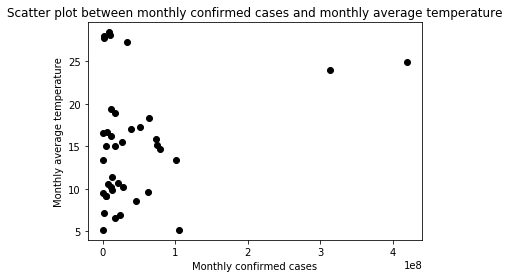

In [83]:
import matplotlib.pyplot as plt
plt.title('Scatter plot between monthly confirmed cases and monthly average temperature')
plt.xlabel('Monthly confirmed cases')
plt.ylabel('Monthly average temperature')
plt.scatter(final_data['average_monthly_confirmed'],final_data['avg_temp'], color='black')

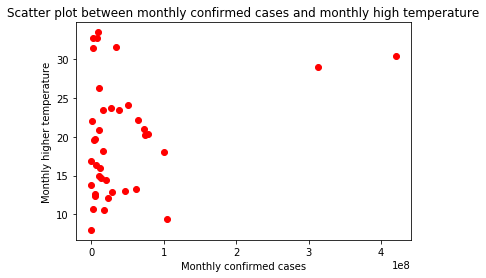

In [85]:
plt.title('Scatter plot between monthly confirmed cases and monthly high temperature')
plt.xlabel('Monthly confirmed cases')
plt.ylabel('Monthly higher temperature')
plt.scatter(final_data['average_monthly_confirmed'],final_data['high'], color='red')

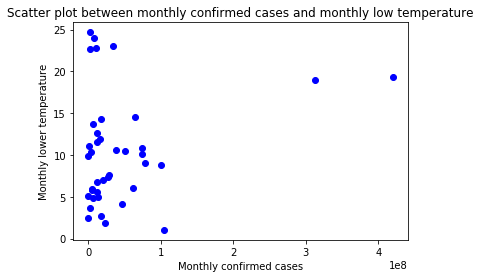

In [86]:
plt.title('Scatter plot between monthly confirmed cases and monthly low temperature')
plt.xlabel('Monthly confirmed cases')
plt.ylabel('Monthly lower temperature')
plt.scatter(final_data['average_monthly_confirmed'],final_data['low'], color='blue')

Through this plot we can say that the covid cases does not seems to be decreasing with the increase in temperature.

# 9

##### Articulate your own research question related to COVID-19 and try to provide an answer to it using the given data set.

The effect of population level of a country on the amount of confirmed cases

In [115]:
data3=[update_df['Confirmed'], update_pop['population']]
names3= ["Confirmed", "population"]
df_population= pd.concat(data3, axis=1, keys=names3)

In [116]:
df_population

,Confirmed,population
0,104850.0,1388232693
1,31484605.0,1342512706
2,34672690.0,326474013
3,3287727.0,263510146
4,19797086.0,211243220
...,...,...
177,3083.0,38022
178,2833.0,38010
179,5130.0,32104
180,27.0,21726


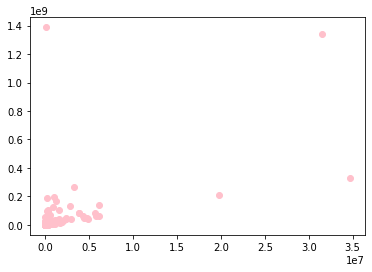

In [121]:
plt.scatter(df_population['Confirmed'],df_population['population'], color='pink')

We can see a slight correlation between the population and the confirmed cases. It shows that the number of confirmed cases in a country does depend on the population of the particular country.